In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# constants
LABELS = ["Normal", "Fraud"]
RANDOM_SEED = 105

In [19]:
# data reading
df = pd.read_csv("creditcard.csv")

31


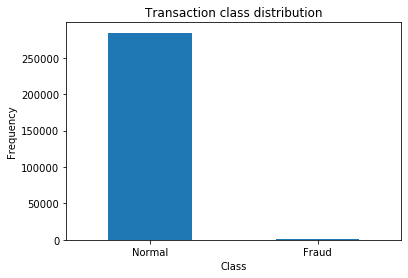

In [16]:
# describe dataset by classes
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [71]:
# data preparing
from sklearn.model_selection import train_test_split

data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))


train_data, test_data = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

X_train = train_data.drop(['Class'], axis=1).values
X_test = test_data.drop(['Class'], axis=1).values

Y_train = train_data['Class'].values
Y_test = test_data['Class'].values

In [97]:
# Creating model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [98]:
# train model
model.fit(X_train, Y_train)

In [99]:
# saving model without .values in data set
from sklearn.externals import joblib
file_name = 'model_200.pkl'

with open(file_name, 'wb') as f:
    joblib.dump(model, f, compress=1)
#model = joblib.load(file_name)

In [108]:
import numpy as np

predictions = model.predict(X_test)

In [109]:
mse = np.mean(np.power(X_test_full['Class'] - predictions, 2))
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': Y_test})

In [110]:
error_df.describe()

,reconstruction_error,true_class
count,5.696200e+04,56962.000000
mean,4.213335e-04,0.001562
std,1.084212e-19,0.039497
min,4.213335e-04,0.000000
25%,4.213335e-04,0.000000
50%,4.213335e-04,0.000000
75%,4.213335e-04,0.000000
max,4.213335e-04,1.000000


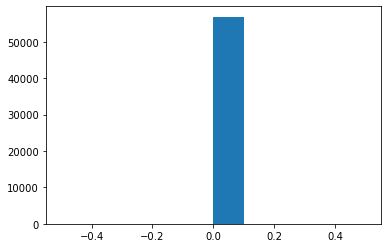

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

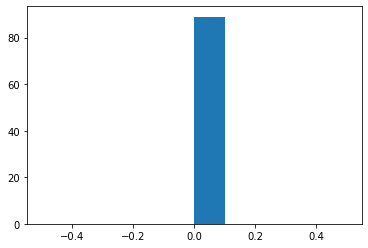

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [113]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

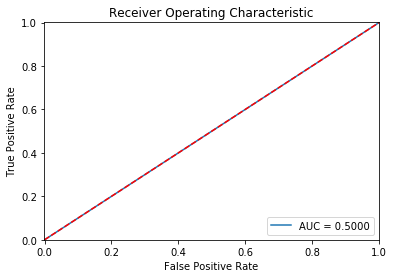

In [120]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();